# HW4 Machine Learning

** 1&2. Import and Prepare data**

In [7]:
import numpy as np
import pandas as pd
np.set_printoptions(precision=2)

# import the data, 
# using same dataset used for HW3, as it helps my research
input_data_file = 'HW3_input_data.xlsx'
sheet = 'Gait_data'
data_all = pd.read_excel(input_data_file,sheet_name=sheet,header=0)
data_all = data_all.dropna()
# example: df[(df[col] > 0.5) & (df[col] < 0.7)]
#data_all = data_all[(data_all['Dx'] == 0) | (data_all['Dx'] == 2)] # select Controls and PDs
subj_info = data_all.loc[:,['SubjID','Dx']]
#data_all = data_all.iloc[:,2:]

data = data_all.loc[:,['GaitSpeed_LRmean_2minWalk','StrideLength_LRmean_2minWalk',
                   'DoubleSupportTime_LRmean_2minWalk','FootStrikeAngle_LRmean_2minWalk',
                   'Turn_Velocity_mean_2minWalk','Steps_in_Turn_mean_2minWalk',
                   'GaitSpeed_LRmean_1minDT','StrideLength_LRmean_1minDT',
                   'DoubleSupportTime_LRmean_1minDT','FootStrikeAngle_LRmean_1minDT',
                   'Turn_Velocity_mean_1minDT','Steps_in_Turn_mean_1minDT','GaitSpeed', 
                       'StrideLength', 'DoubleSupportTime', 'FootStrikeAngle', 
                       'TurnVelocity', 'StepsInTurn', 'Seated', 'Longwalk', 'Cog_DTC']]


# create meaningful category name for diagnosis
subj_info["Dx_name"] = subj_info["Dx"].astype("category")
subj_info["Dx_name"].cat.categories = ["Controls","FGD","PD"]

print('Features data shape: ',data.shape)
print('Subject information: ',subj_info.shape)
print("Dx name: ", list(subj_info['Dx_name'].cat.categories))
print('Dx code:',set(subj_info.Dx))

Features data shape:  (135, 21)
Subject information:  (135, 3)
Dx name:  ['Controls', 'FGD', 'PD']
Dx code: {0, 1, 2}


**3. Perform 2-D PCA transformation of the input and visualize it**

In [2]:
from sklearn.decomposition import PCA

# 2-D PCA
n = 2 
pca = PCA(n_components=n)
x = pca.fit(data)
x_var = pca.explained_variance_ratio_ * 100
print('First two Principal components percentage contribution: ', x_var)
x_reduced = pca.fit(data).transform(data)
print('PCA reduced data shape: ',x_reduced.shape)

First two Principal components percentage contribution:  [ 56.08  17.96]
PCA reduced data shape:  (135, 2)


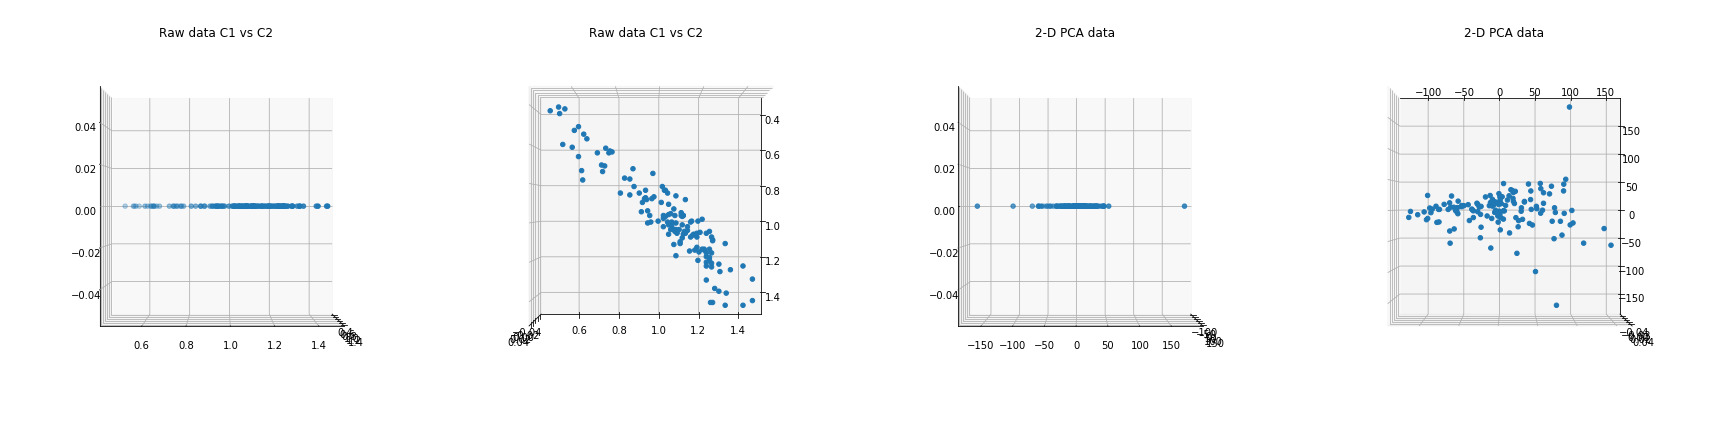

In [3]:
# visualize data
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(24, 6))

ax1 = fig.add_subplot(1,4,1, projection='3d', elev=0, azim=0)
ax1.scatter(data.iloc[:,0],data.iloc[:,1]);
ax1.set_title('Raw data C1 vs C2');

ax2 = fig.add_subplot(1,4,2, projection='3d', elev=90, azim=0)
ax2.scatter(data.iloc[:,0],data.iloc[:,1]);
ax2.set_title('Raw data C1 vs C2');

ax3 = fig.add_subplot(1,4,3, projection='3d', elev=0, azim=0)
ax3.scatter(x_reduced[:,0],x_reduced[:,1]);
ax3.set_title('2-D PCA data');

ax4 = fig.add_subplot(1,4,4, projection='3d', elev=90, azim=270)
ax4.scatter(x_reduced[:,0],x_reduced[:,1]);
ax4.set_title('2-D PCA data');
plt.tight_layout()

**Linear Discriminant Analysis**

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
Dx_n = subj_info['Dx_name']
Dx = subj_info['Dx']
lda = LDA(n_components=n) # 2-D LDA
x_lda = lda.fit_transform(data,Dx_n)
x_lda_pca = lda.fit_transform(x_reduced,Dx_n)
f'x_lda shape: ',x_lda.shape

('x_lda shape: ', (135, 2))

**Visualize**

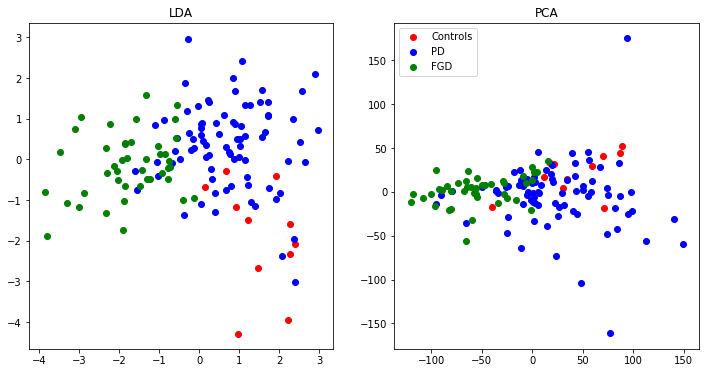

In [5]:
# LDA and PCA plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
clr = "rbg"; m = [1,2,0];

# LDA
for c, i, Dx_l in zip(clr, m, set(Dx_n)):
    #print(c,i,Dx_l)
    ax1.scatter(x_lda[Dx == i, 0], x_lda[Dx == i, 1], c=c, label=Dx_l)
ax1.set_title('LDA');

#PCA
for c, i, Dx_l in zip(clr, m, set(Dx_n)):
    ax2.scatter(x_reduced[Dx == i, 0], x_reduced[Dx == i, 1], c=c, label=Dx_l)
ax2.legend()
ax2.set_title('PCA');

**4. Split data to 50% training and 50% test set and GMM**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, subj_info.Dx, 
                                   test_size=0.5,
                                   #random_state=100,
                                   shuffle=True,
                                   stratify=subj_info.Dx
                                  )

#print(np.c_[X_train, y_train])
print('Training data set X-Y shape: ', X_train.shape, y_train.shape)
#print('-' * 12)
#print(np.c_[X_test, y_test])
print('Test data set X-Y shape: ', X_test.shape, y_test.shape)

Training data set X-Y shape:  (67, 21) (67,)
Test data set X-Y shape:  (68, 21) (68,)


In [7]:
'''# PCA on the training data
n = 3 
pca = PCA(n_components=n)
x = pca.fit(X_train)
x_var = pca.explained_variance_ratio_ * 100
print('First two Principal components percentage contribution: ', x_var)
x_reduced = pca.fit(X_train).transform(X_train)
print('PCA reduced data shape: ',x_reduced.shape)'''

"# PCA on the training data\nn = 3 \npca = PCA(n_components=n)\nx = pca.fit(X_train)\nx_var = pca.explained_variance_ratio_ * 100\nprint('First two Principal components percentage contribution: ', x_var)\nx_reduced = pca.fit(X_train).transform(X_train)\nprint('PCA reduced data shape: ',x_reduced.shape)"

**Gaussian Mixuture Modeling**

priors: [ 0.04  0.33  0.24  0.25  0.13]


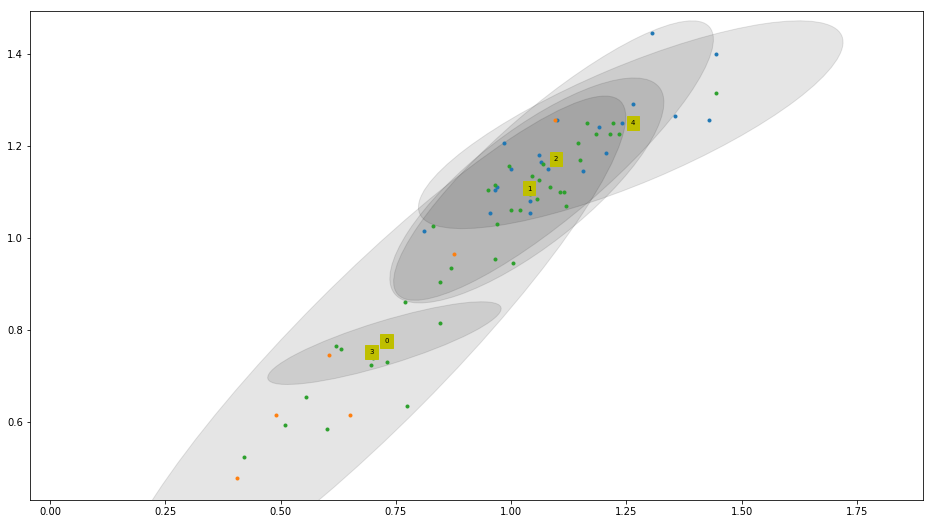

In [8]:
# visualize ellipses with input training data
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(X_train) #try fitting the PCA reduced training data
print("priors: {}".format(gmm.weights_))

def draw_ellipses(gmm):
    from matplotlib.patches import Ellipse
    for k in range(gmm.n_components):
        t = gmm.covariance_type
        if t == 'full':
            c = gmm.covariances_[k][:2, :2]
        elif t == 'tied':
            c = gmm.covariances_[:2, :2]
        elif t == 'diag':
            c = np.diag(gmm.covariances_[k][:2])
        elif t == 'spherical':
            c = np.eye(gmm.means_.shape[1]) * gmm.covariances_[k]
        v, w = np.linalg.eigh(c)
        u = w[0] / np.linalg.norm(w[0])
        angle = 180 * np.arctan2(u[1], u[0]) / np.pi  # in degrees
        radius = 2 * np.sqrt(2. * v) * 2  # 2 stdev = %95
        xy = gmm.means_[k, :2]
        plt.text(xy[0], xy[1], k, size=7, backgroundcolor='y')
        ell = Ellipse(xy, radius[0], radius[1], 180 + angle, alpha=0.1, color='k')
        plt.gca().add_artist(ell)

plt.figure(figsize=(16,9))
for k in set(Dx):
    plt.plot(X_train.loc[y_train==k,X_train.columns[0]],X_train.loc[y_train==k,X_train.columns[1]], '.')
    #plt.scatter(X_train.loc[y_train==k,X_train.columns[0]],X_train.loc[y_train==k,X_train.columns[1]], c='rbg')
draw_ellipses(gmm)
plt.axis('equal');

In [9]:
#gmm.weights = np.array([.1, .3, .6])
for k in set(Dx):
    data1 = X_train[y_train == k]  # data per component
    print( 'Train Group', k, 'shape: ', data1.shape)
    gmm.means_[k] = np.mean(data1, axis=0)
    #print('gmm means\n', gmm.means_[k])
    gmm.covariances_[k] = np.cov(data1, rowvar=0)
    #print('gmm covariance\n', gmm.covariances_[k])

Train Group 0 shape:  (21, 21)
Train Group 1 shape:  (6, 21)
Train Group 2 shape:  (40, 21)


**4. Vary the number of components (from 1 to ~32, depending on the problem perhaps higher) while fitting Gaussian mixture models on the training input. Then evaluate the score (the data likelihood given the model, i. e. how well the data fits the model) on the training data and also on the test data.**

In [10]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
N = 40
score_gmm = np.zeros([N,2]); n_comp = np.zeros(N)
for n1 in range(1,N):
    n_comp[n1] = n1;
    gmm = GaussianMixture(n_components=n1, covariance_type='full')
    gmm.fit(X_train)
    #print("priors: {}".format(gmm.weights_))

    # GMM predict
    y_train_gmm = gmm.predict(X_train)
    y_test_gmm = gmm.predict(X_test)
    score_gmm[n1,0] = accuracy_score(y_train_gmm, y_train) * 100;
    score_gmm[n1,1] = accuracy_score(y_test_gmm, y_test) * 100;

    #print('Training data, GMM accuracy % score: ', accuracy_score(y_train_gmm, y_train) * 100,'\n')
    #print('Test data, GMM accuracy % score: ', accuracy_score(y_test_gmm, y_test) * 100,'\n')
    '''print('Num of FGD in training data: ', sum(y_train == 1))
    print('Num of FGD in test data: ', sum(y_test == 1))
    print('\nNum of Controls predicted by GMM: ', sum(y_test_gmm == 0))
    print('Num of FGD predicted by GMM: ', sum(y_test_gmm == 1))
    print('Num of PD predicted by GMM: ', sum(y_test_gmm == 2))'''

print(score_gmm)

[[  0.     0.  ]
 [ 31.34  32.35]
 [  0.     7.35]
 [ 25.37  20.59]
 [ 28.36  50.  ]
 [ 23.88   5.88]
 [  2.99   0.  ]
 [ 44.78  23.53]
 [  4.48  57.35]
 [ 11.94   1.47]
 [  4.48   0.  ]
 [  8.96  48.53]
 [  1.49   0.  ]
 [  8.96  17.65]
 [ 23.88  38.24]
 [ 25.37  55.88]
 [  7.46  14.71]
 [ 14.93   1.47]
 [  2.99   0.  ]
 [ 16.42  25.  ]
 [ 11.94   2.94]
 [  1.49   0.  ]
 [  4.48  22.06]
 [  5.97   5.88]
 [ 19.4   25.  ]
 [  5.97  20.59]
 [  4.48   0.  ]
 [  5.97   4.41]
 [  1.49   0.  ]
 [  8.96   0.  ]
 [  1.49   0.  ]
 [  2.99   0.  ]
 [  1.49   0.  ]
 [  1.49   1.47]
 [  2.99   1.47]
 [  1.49   1.47]
 [ 14.93  27.94]
 [  2.99   1.47]
 [  4.48   0.  ]
 [  1.49   2.94]]


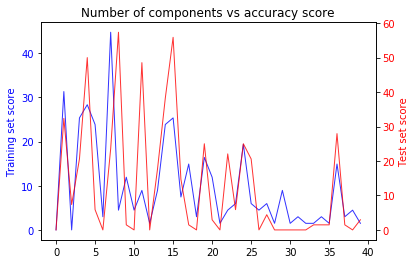

In [11]:
# Plot number of components vs scores
fig, ax1 = plt.subplots()

ax1.plot(n_comp, score_gmm[:,0], lw=1, color="blue", alpha = 0.8)
ax1.set_ylabel(r"Training set score", color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(n_comp, score_gmm[:,1], lw=1, color="red", alpha = 0.8)
ax2.set_ylabel(r"Test set score", color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
plt.title('Number of components vs accuracy score');

_As I increase the number of components, it tends to incease in prediction accuracy and then decrease. But the results are totally unreliable for this dataset, as the confusion matrix shows poor precision/recall and f1-score._

In [12]:
# Get confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('\nClassification report for GMM prediction:')
print('-' * 36)
print(classification_report(y_test, y_test_gmm))
#cfs=confusion_matrix(y_test, y_test_gmm)


Classification report for GMM prediction:
------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        22
          1       0.00      0.00      0.00         5
          2       0.67      0.05      0.09        41
          3       0.00      0.00      0.00         0
          6       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.00      0.00      0.00         0
         18       0.00      0.00      0.00         0
         22       0.00      0.00      0.00         0
         23       0.00      0.00      0.00         0
         25       0.00      0.00      0.00         0
         29       0.00      0.00      0.00         0
         31       0.00      0.00      0.00         0
         33       

/Users/ragotham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ragotham/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**5. Support Vector Machine**

_With same 50% training and test dataset used for GMM_

In [74]:
from sklearn import svm
clf = svm.SVC(gamma=1e-3, C=100,kernel='linear')
clf.fit(X_train, y_train)

y_svm = clf.predict(X_test )
print('Test data, SVM accuracy % score: ', clf.score(X_test,y_test) * 100)
print('Num of FGD in training data: ', sum(y_train == 1))
print('Num of FGD in test data: ', sum(y_test == 1))
print('Num of FGD predicted by SVM: ', sum(y_svm == 1))

Test data, SVM accuracy % score:  70.5882352941
Num of FGD in training data:  6
Num of FGD in test data:  5
Num of FGD predicted by SVM:  3


In [75]:
# Get confusion matrix
print('\nConfusion matrix for SVM prediction:')
print('-' * 36)
print(classification_report(y_test, y_svm))
cfs = confusion_matrix(y_test, y_svm)


Confusion matrix for SVM prediction:
------------------------------------
             precision    recall  f1-score   support

          0       0.80      0.55      0.65        22
          1       0.00      0.00      0.00         5
          2       0.72      0.88      0.79        41

avg / total       0.69      0.71      0.69        68



**SVC with Optimization and Cross Validation**

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

inner_cv = StratifiedKFold(n_splits=3, shuffle=True)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True)

parameters = [{'kernel': ['rbf'],   
               'C': [0.1, 1, 10], 
               'gamma': [1e-3, 'auto']},
              {'kernel': ['rbf'], 
               'C': [0.1, 1, 10],
               'gamma': [1e-5,'auto']},
              {'kernel': ['rbf'], 
               'C': [0.1, 1, 10],
               'gamma': [1e-4,'auto']}]

clf = GridSearchCV(svm.SVC(), 
                   parameters, 
                   cv=inner_cv,  # train with inner cross validation
                   n_jobs=-1)
clf.fit(data, subj_info.Dx)
clf.best_params_, clf.best_score_

({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.80000000000000004)

In [77]:
# Test with outer cross validation, raw data
scores_raw = cross_val_score(clf, data, subj_info.Dx,
                         cv=outer_cv,  
                         n_jobs=1)
print(scores_raw)
print('Mean scores with raw data:',scores_raw.mean() * 100)

[ 0.87  0.76  0.7 ]
Mean scores with raw data: 77.6555409164


In [78]:
# Takes really long time to compute, analyse why
# Test with outer cross validation, PCA reduced data
#scores_pca = cross_val_score(clf, x_reduced, subj_info.Dx,
#                         cv=outer_cv,  
#                         n_jobs=1)
#print(scores_pca)
#print('Mean scores with PCA data:',scores_pca.mean() * 100)
#'''[ 0.76  0.73  0.77] Mean scores with PCA data: 75.5643390426'''

In [80]:
# Test with outer cross validation, LDA reduced data
scores_lda = cross_val_score(clf, x_lda, subj_info.Dx,
                         cv=outer_cv,
                         n_jobs=1)
print(scores_lda)
print('Mean scores with LDA data:',scores_lda.mean() * 100)

[ 0.8   0.84  0.77]
Mean scores with LDA data: 80.7173181086


_On Average, LDA reduced data gives better score than raw or PCA readuced data_

**Using pipelines**

In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

inner_cv = StratifiedKFold(n_splits=5, shuffle=True)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True)

pipe = make_pipeline(StandardScaler(), LDA(), svm.SVC())
parameters = [{'lineardiscriminantanalysis__n_components':[2],
                'svc__kernel': ['rbf'],
               'svc__C': [0.1, 1, 10],
               'svc__gamma': [1e-3, 1e-4, 'auto']},
              {'lineardiscriminantanalysis__n_components':[2,3],
                'svc__kernel': ['linear'],
               'svc__C': [0.01, 0.1, 1, 10, 100, 1000],
               'svc__gamma': [1e-4, 1e-5, 'auto']}]

clf = GridSearchCV(pipe, parameters, 
                    cv=inner_cv,
                    n_jobs=-1)

scores = cross_val_score(clf, data, subj_info.Dx,
                         cv=outer_cv,
                         #scoring='r2',
                         n_jobs=1) 
print(scores)
print('Mean percentage score: ',scores.mean()*100)
#pipe.get_params().keys()

[ 0.69  0.7   0.89  0.77  0.73]
Mean percentage score:  75.6449553001
